# Data Visualization
Discussion link: https://docs.google.com/document/d/1m-8euIMRwthBe2-fu-KlSa1ggrE0Q0AF5cHe-bxAlTQ/edit?tab=t.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%cd ../child-mind-institute-problematic-internet-use/

c:\Users\NanaChang\OneDrive\文件\UCSD\ECE 225A\project_visuazlization\child-mind-institute-problematic-internet-use


In [ ]:
# Load Internet Usage Behavior Data
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_dictionary = pd.read_csv("data_dictionary.csv")

display(data_train)
display(data_dictionary)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


Text(0, 0.5, 'Density')

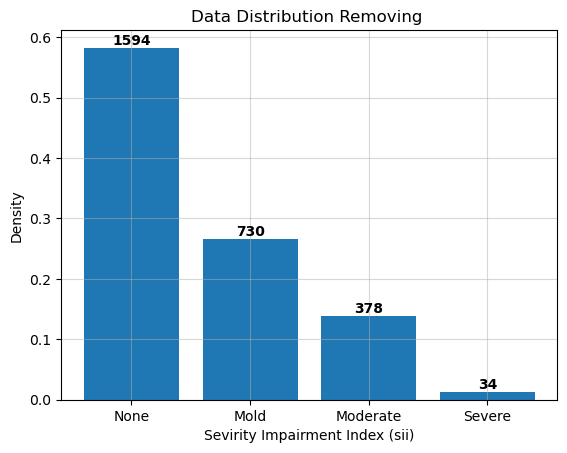

In [165]:
data_0 = data_train[data_train["sii"] == 0]
data_1 = data_train[data_train["sii"] == 1]
data_2 = data_train[data_train["sii"] == 2]
data_3 = data_train[data_train["sii"] == 3]
sii_label = ["None", "Mold", "Moderate", "Severe"]
data_len = [len(data_0), len(data_1), len(data_2), len(data_3)]
fig, ax = plt.subplots()
ax.bar(sii_label, [val / sum(data_len) for val in data_len])
for idx, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005 + bar.get_y(),
        data_len[idx], ha = 'center',
        color = 'k', weight = 'bold', size = 10)
plt.grid(alpha=0.5)
plt.title("Data Distribution Removing ")
plt.xlabel("Sevirity Impairment Index (sii)")
plt.ylabel("Density")

In [166]:
print(len(data_train.columns))
print(data_train.columns)

82
Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_L

25


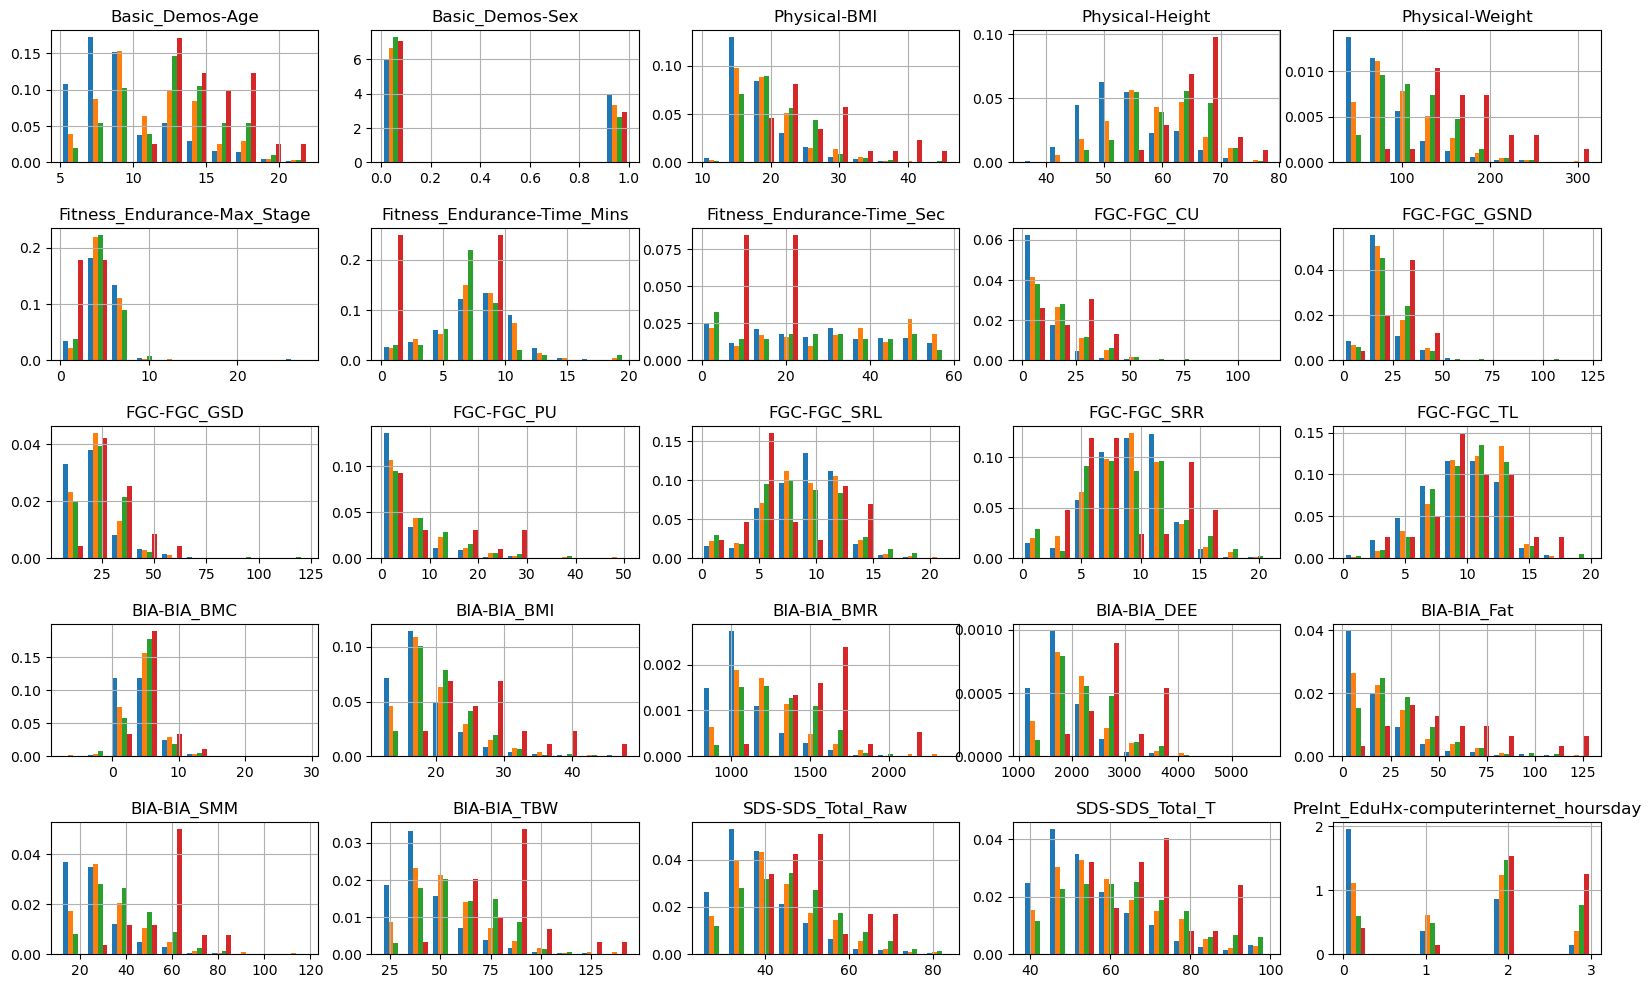

In [7]:
interested_item = ["Basic_Demos-Age", "Basic_Demos-Sex",
                   "Physical-BMI", "Physical-Height", "Physical-Weight",
                   "Fitness_Endurance-Max_Stage", "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec",
                   "FGC-FGC_CU", "FGC-FGC_GSND", "FGC-FGC_GSD", "FGC-FGC_PU", "FGC-FGC_SRL", "FGC-FGC_SRR", "FGC-FGC_TL",
                   "BIA-BIA_BMC", "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_Fat", "BIA-BIA_SMM", "BIA-BIA_TBW",
                   "SDS-SDS_Total_Raw", "SDS-SDS_Total_T", 
                   "PreInt_EduHx-computerinternet_hoursday"]
print(len(interested_item))

plt.figure(figsize=(20, 12))
for iitem in range(len(interested_item)):
    plt.subplot(5, 5, iitem + 1)
    plt.hist([data_0[interested_item[iitem]],  data_1[interested_item[iitem]],  data_2[interested_item[iitem]], data_3[interested_item[iitem]]], density=True)
    plt.title(interested_item[iitem])
    plt.grid()

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

5


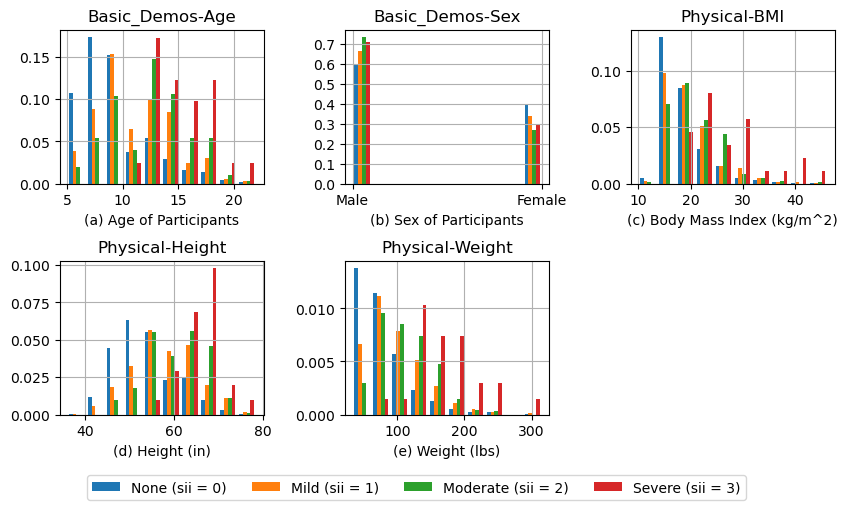

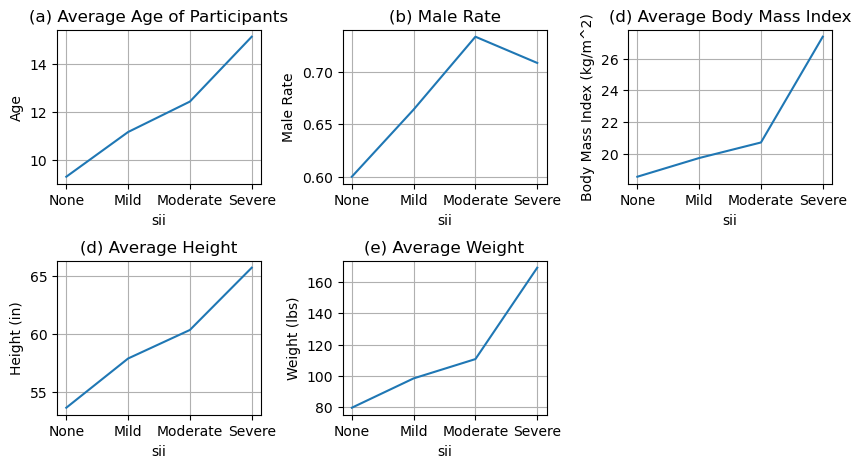

In [147]:
# For figure on the reports
interested_item = ["Basic_Demos-Age", "Basic_Demos-Sex",
                   "Physical-BMI", "Physical-Height", "Physical-Weight",]
print(len(interested_item))

plt.figure(figsize=(10, 5))
for iitem in range(len(interested_item)):
    plt.subplot(2, 3, iitem + 1)
    plt.hist([data_0[interested_item[iitem]],  data_1[interested_item[iitem]],  data_2[interested_item[iitem]], data_3[interested_item[iitem]]], density=True)
    if iitem == 0:
        plt.xlabel("(a) Age of Participants")
        
    elif iitem == 1:
        plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
        plt.xticks([0, 1], ["Male", "Female"])
        plt.xlabel("(b) Sex of Participants")
    elif iitem == 2:
        plt.xlabel("(c) Body Mass Index (kg/m^2)")
    elif iitem == 3:
        plt.xlabel("(d) Height (in)")
    elif iitem == 4:
        plt.xlabel("(e) Weight (lbs)")
        plt.legend(["None (sii = 0)", "Mild (sii = 1)", "Moderate (sii = 2)", "Severe (sii = 3)"], loc='lower center', bbox_to_anchor=(-1.3, -0.6, 3.3, -0.6), mode="expand", ncol=4)
    plt.title(interested_item[iitem])
    plt.grid()

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.savefig("../Project_225A/figure/0_visualization.png")
plt.show()

plt.figure(figsize=(10, 5))
for iitem in range(len(interested_item)):
    mean_val = []
    for data in [data_0, data_1, data_2, data_3]:
        if iitem != 1:
            mean_val.append(np.mean(data[interested_item[iitem]]))
        else:
            mean_val.append(1 - np.mean(data[interested_item[iitem]]))

    plt.subplot(2, 3, iitem + 1)
    plt.plot(mean_val)
    
    if iitem == 0:
        plt.title("(a) Average Age of Participants")
        plt.ylabel("Age")
    elif iitem == 1:
        plt.ylabel("Male Rate")
        plt.title("(b) Male Rate")
    elif iitem == 2:
        plt.title("(d) Average Body Mass Index")
        plt.ylabel("Body Mass Index (kg/m^2)")
    elif iitem == 3:
        plt.title("(d) Average Height")
        plt.ylabel("Height (in)")
    elif iitem == 4:
        plt.title("(e) Average Weight")
        plt.ylabel("Weight (lbs)")
    plt.grid()
    plt.xticks([0, 1, 2, 3], ["None", "Mild", "Moderate", "Severe"], rotation=0)
    plt.xlabel("sii")
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.savefig("../Project_225A/figure/0_visualization_mean.png")
plt.show()

21


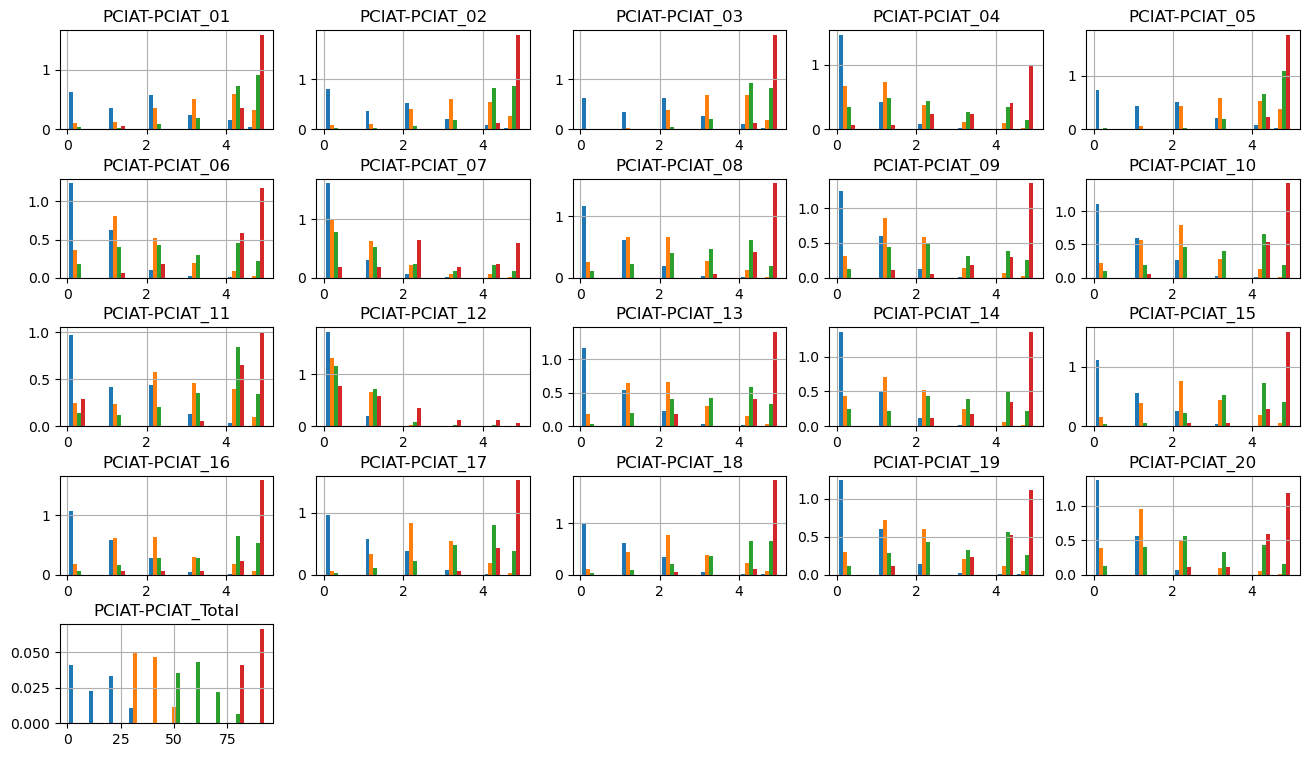

In [167]:
# Not input
interested_item = ["PCIAT-PCIAT_" + str(n + 1).zfill(2) for n in range(20)]
interested_item.append("PCIAT-PCIAT_Total")
print(len(interested_item))

plt.figure(figsize=(16, 9))
for iitem in range(len(interested_item)):
    plt.subplot(5, 5, iitem + 1)
    plt.hist([data_0[interested_item[iitem]],  data_1[interested_item[iitem]],  data_2[interested_item[iitem]], data_3[interested_item[iitem]]], density=True)
    plt.title(interested_item[iitem])
    plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

# Physiological Data Visualization

In [10]:
weekday_dic = {
    1: "Mon", 2: "Tues", 3: "Wed", 4: "Thurs", 5: "Fri", 6: "Sat", 7: "Sun"
}

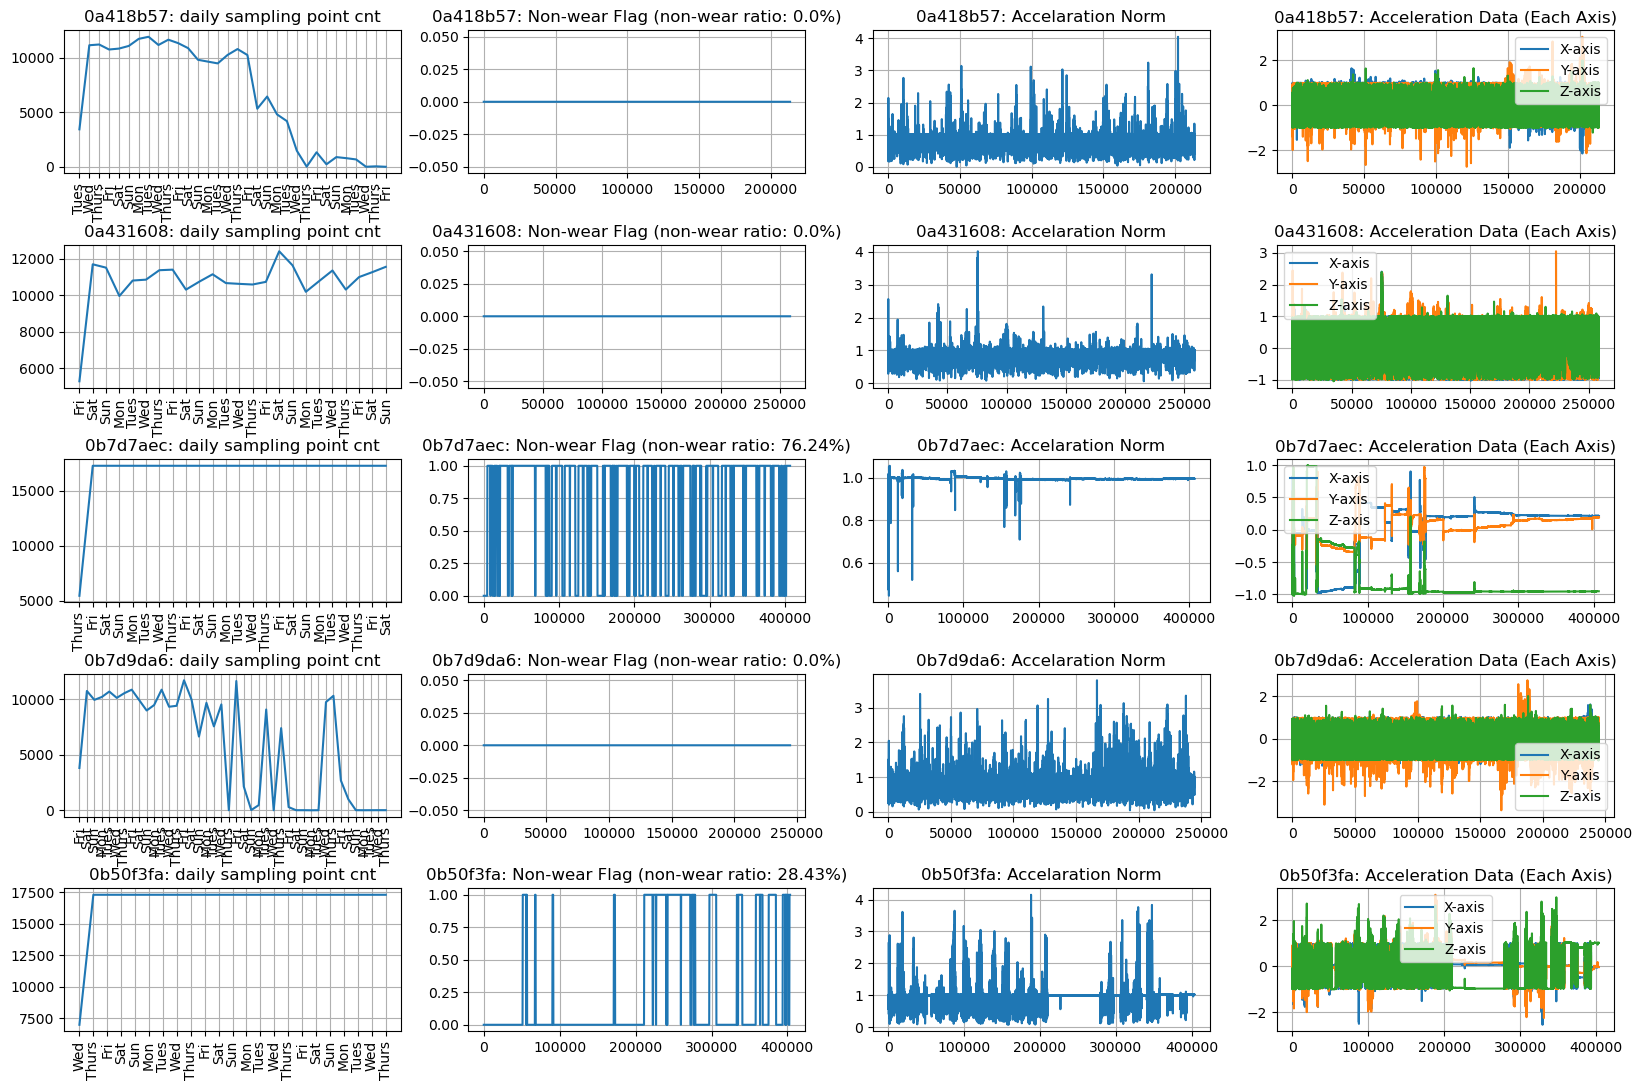

In [11]:
# A brief plotout for the first 5 ids
id_lst = ["0a418b57", "0a431608", "0b7d7aec", "0b7d9da6", "0b50f3fa"]

plt.figure(figsize=(20, 13))
plot_feat_cnt = 4
for iid, id in enumerate(id_lst):
    parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')

    # Plot daily sampling point cnt
    wd = parq["weekday"]
    cnt = 0
    day_pt_cnt = []
    day_pt = []
    for idx in range(len(wd) - 1):
        if wd[idx] != wd[idx + 1]:
            day_pt_cnt.append(cnt)
            day_pt.append(weekday_dic[wd[idx]])
            cnt = 0
        else:
            cnt += 1
    plt.subplot(len(id_lst), plot_feat_cnt, 1 + iid * plot_feat_cnt)
    plt.plot(day_pt_cnt)
    plt.xticks(np.arange(len(day_pt_cnt)), day_pt, rotation=90)
    plt.title(id + ": daily sampling point cnt")
    plt.grid()

    # Plot non-wear flag
    plt.subplot(len(id_lst), plot_feat_cnt, 2 + iid * plot_feat_cnt)
    plt.plot(parq["non-wear_flag"])
    non_wear_ratio = sum(parq["non-wear_flag"]) / len(parq["non-wear_flag"])
    plt.title(id + ": Non-wear Flag (non-wear ratio: " + str(int(non_wear_ratio * 10000) / 100) + "%)")
    plt.grid()

    # Plot norm of acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 3 + iid * plot_feat_cnt)
    acc_norm = [np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2)for n in range(len(parq["X"]))]
    plt.plot(acc_norm)
    plt.grid()
    plt.title(id + ": Accelaration Norm")

    # Plot each axis of Acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 4 + iid * plot_feat_cnt)
    plt.plot(parq["X"], label="X-axis")
    plt.plot(parq["Y"], label="Y-axis")
    plt.plot(parq["Z"], label="Z-axis")
    plt.legend()
    plt.grid()
    plt.title(id + ": Acceleration Data (Each Axis)")

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()
    

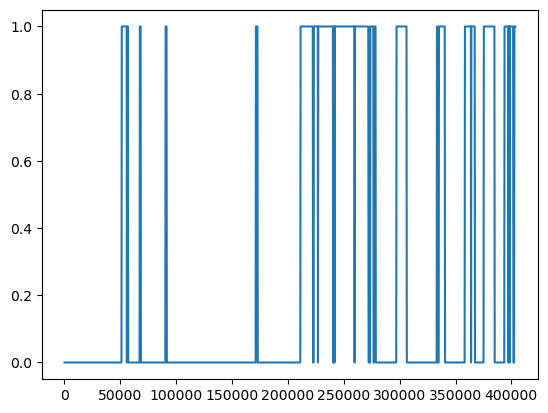

In [12]:
plt.plot(parq["non-wear_flag"])

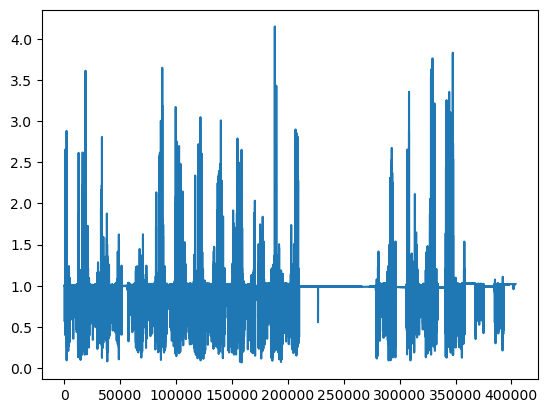

In [13]:
plt.plot([np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2) for n in range(len(parq["X"]))])

([<matplotlib.axis.XTick at 0x245b8121040>,
 [Text(0, 0, 'Wed'),
  Text(1, 0, 'Thurs'),
  Text(2, 0, 'Fri'),
  Text(3, 0, 'Sat'),
  Text(4, 0, 'Sun'),
  Text(5, 0, 'Mon'),
  Text(6, 0, 'Tues'),
  Text(7, 0, 'Wed'),
  Text(8, 0, 'Thurs'),
  Text(9, 0, 'Fri'),
  Text(10, 0, 'Sat'),
  Text(11, 0, 'Sun'),
  Text(12, 0, 'Mon'),
  Text(13, 0, 'Tues'),
  Text(14, 0, 'Wed'),
  Text(15, 0, 'Thurs'),
  Text(16, 0, 'Fri'),
  Text(17, 0, 'Sat'),
  Text(18, 0, 'Sun'),
  Text(19, 0, 'Mon'),
  Text(20, 0, 'Tues'),
  Text(21, 0, 'Wed'),
  Text(22, 0, 'Thurs')])

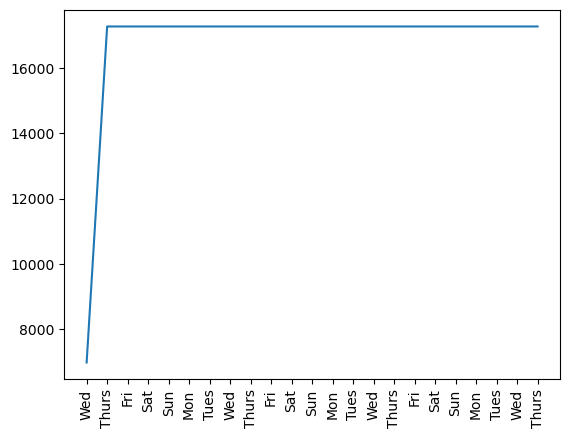

In [14]:
wd = parq["weekday"]
cnt = 0
day_pt_cnt = []
day_pt = []
for idx in range(len(wd) - 1):
    if wd[idx] != wd[idx + 1]:
        day_pt_cnt.append(cnt)
        day_pt.append(weekday_dic[wd[idx]])
        cnt = 0
    else:
        cnt += 1

plt.plot(day_pt_cnt)
plt.xticks(np.arange(len(day_pt_cnt)), day_pt, rotation=90)


In [15]:
print(day_pt_cnt)

[6971, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279, 17279]


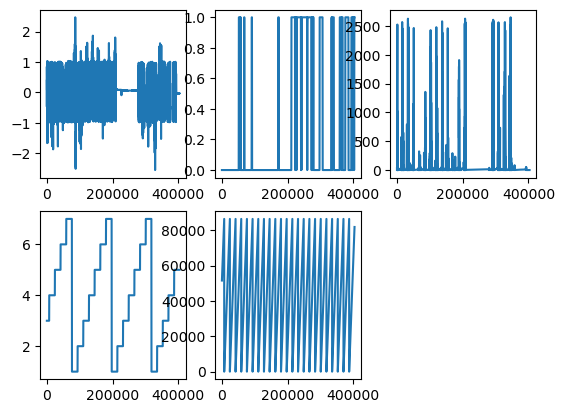

In [16]:
plt.subplot(2, 3, 1)
plt.plot(parq["X"])
plt.subplot(2, 3, 2)
plt.plot(parq["non-wear_flag"])
plt.subplot(2, 3, 3)
plt.plot(parq["light"])
plt.subplot(2, 3, 4)
plt.plot(parq["weekday"])
plt.subplot(2, 3, 5)
plt.plot(parq["time_of_day"] / 1e9)

In [114]:
ytick

array([ 0.,  5., 10., 15., 20., 25.])

,id,non_wear_ratio,acc_cnt,acc_cnt_wear,acc_cnt_night,acc_cnt_day,enmo_avg,enmo_wear,enmo_night,enmo_day,enmo_high,sii
0,00115b9f,0.000000,0.059387,0.059387,0.026096,0.057444,0.047388,0.047388,0.026886,0.047848,0.000231,1
1,001f3379,0.655708,0.014682,0.023693,0.010124,0.034350,0.011926,0.016461,0.005247,0.025072,0.000008,1
2,00f332d1,0.171246,0.030114,0.034049,0.014085,0.049925,0.030255,0.036441,0.005242,0.065173,0.000317,1
3,01085eb3,0.035210,0.036489,0.037325,0.010500,0.053217,0.032946,0.033677,0.005423,0.052328,0.000059,0
4,012cadd8,0.000000,0.055564,0.055564,0.010817,0.087172,0.058280,0.058280,0.004680,0.103679,0.002308,0
...,...,...,...,...,...,...,...,...,...,...,...,...
967,fe9c71d8,0.137257,0.051195,0.053595,0.022587,0.075386,0.043686,0.045263,0.010077,0.072284,0.000381,0
968,fecc07d6,0.939101,0.002205,0.012529,0.001829,0.048425,0.002962,0.015427,0.001789,0.050686,0.000000,0
969,ff18b749,0.000000,0.070869,0.070869,0.018886,0.106754,0.053595,0.053595,0.007452,0.094443,0.000790,0
970,ffcd4dbd,0.020323,0.041500,0.041852,0.010746,0.062346,0.028601,0.028744,0.003221,0.048345,0.000052,1


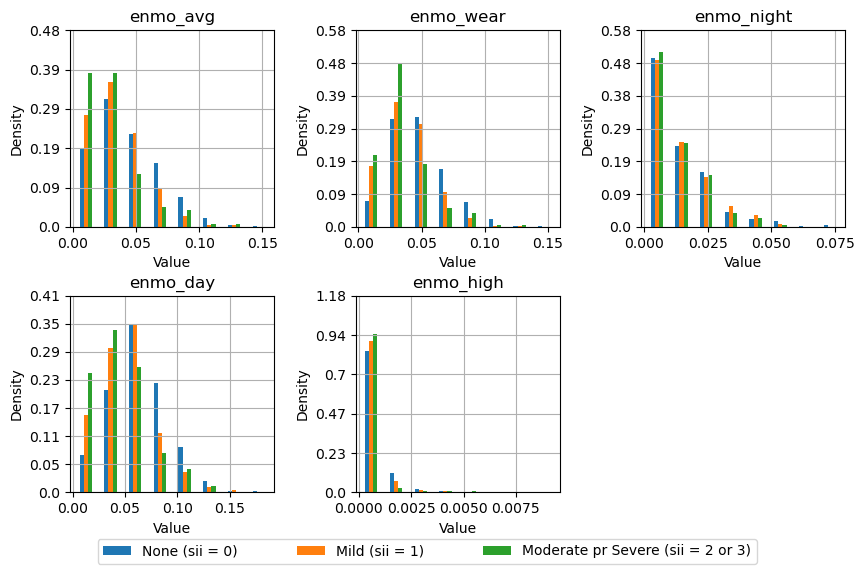

570 258 144


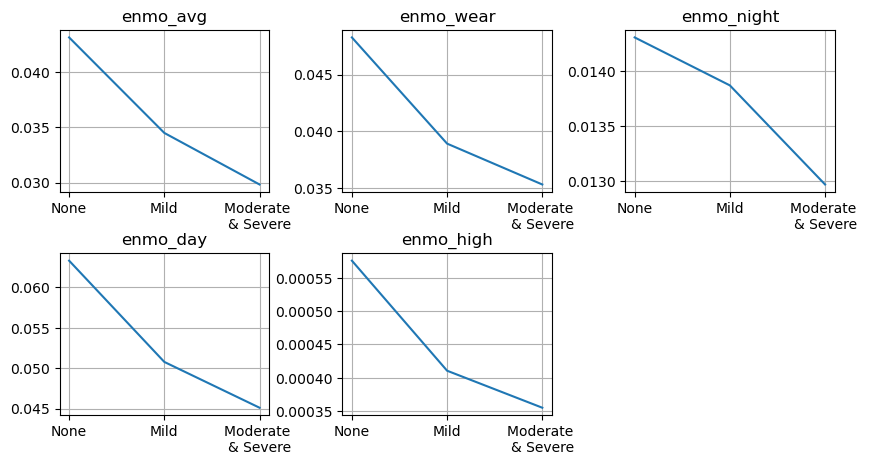

In [140]:
phys_df = pd.read_csv('../Project_225A/phy_other_overall.csv')
display(phys_df)
df_0 = phys_df[phys_df["sii"] == 0]
df_1 = phys_df[phys_df["sii"] == 1]
df_2 = phys_df[phys_df["sii"] >= 2]

plt.figure(figsize=(10, 6))
for iitem, item in enumerate(["enmo_avg", "enmo_wear", "enmo_night", "enmo_day", "enmo_high"]):
    plt.subplot(2, 3, iitem + 1)
    a = plt.hist([df_0[item],  df_1[item],  df_2[item]], density=True, bins=8, rwidth=0.5)
    ytick = plt.gca().get_yticks()
    plt.yticks(ytick, [int(val * (a[1][1] - a[1][0]) * 100) / 100 for val in ytick])
    if iitem == 4:
        plt.legend(["None (sii = 0)", "Mild (sii = 1)", "Moderate pr Severe (sii = 2 or 3)"], loc='lower center', bbox_to_anchor=(-1.3, -0.4, 3.3, -0.4), mode="expand", ncol=4)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title(item)
    plt.grid()

plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.savefig("../Project_225A/figure/1_phy_histogram_visualization.png")
plt.show()

plt.figure(figsize=(10, 5))
for iitem, item in enumerate(["enmo_avg", "enmo_wear", "enmo_night", "enmo_day", "enmo_high"]):
    mean_val = [np.mean(df[item]) for df in [df_0, df_1, df_2]]
    plt.subplot(2, 3, iitem + 1)
    plt.plot(mean_val)
    plt.title(item)
    plt.grid()
    plt.xticks([0, 1, 2], ["None", "Mild", "Moderate \n& Severe"])

plt.subplots_adjust(wspace=0.35, hspace=0.38)
plt.savefig("../Project_225A/figure/1_phy_average_visualization.png")
print(len(df_0), len(df_1), len(df_2))

In [161]:
phys_stat_df = pd.read_csv("../Project_225A/phy_stat_overall.csv")
print(np.mean(phys_stat_df["non-wear_flag_mean"]))
print(len(phys_stat_df[phys_stat_df["sii"] == 0]))
print(len(phys_stat_df[phys_stat_df["sii"] == 1]))
print(len(phys_stat_df[phys_stat_df["sii"] == 2]))
print(len(phys_stat_df[phys_stat_df["sii"] == 3]))

0.22199020349899598
583
266
137
10
